In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean, cityblock, minkowski, cosine
from sklearn.metrics import jaccard_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
print('Features of iris dataset')
print(iris.feature_names)
a, b = X[0], X[1]

# Euclidean Distance: straight-line distance
print("Euclidean:", euclidean(a, b))

# Manhattan Distance: sum of absolute differences
print("Manhattan:", cityblock(a, b))

# Cosine Similarity: angle similarity between vectors
print("Cosine Similarity:", 1 - cosine(a, b))

# Minkowski Distance: generalized distance (p=3)
print("Minkowski (p=3):", minkowski(a, b, p=3))

# Jaccard Index: similarity between binary vectors
a_bin = (a > np.mean(a)).astype(int)
b_bin = (b > np.mean(b)).astype(int)
print(a_bin)
print(b_bin)
print("Jaccard Index:", jaccard_score(a_bin, b_bin))

Features of iris dataset
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Euclidean: 0.5385164807134502
Manhattan: 0.6999999999999993
Cosine Similarity: 0.9985791635040219
Minkowski (p=3): 0.5104468722001463
[1 1 0 0]
[1 1 0 0]
Jaccard Index: 1.0


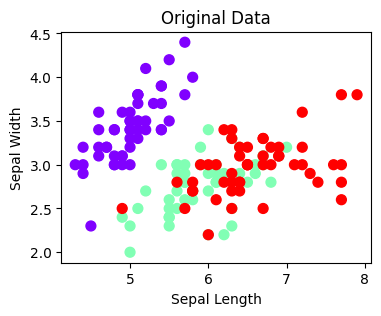

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


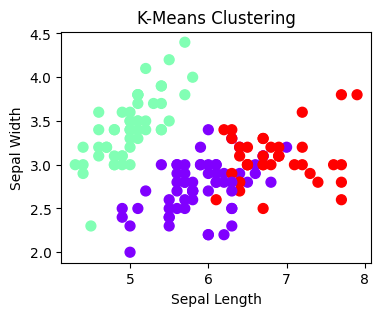

In [3]:
import matplotlib.pyplot as plt
def plot_clusters(X, labels, title):
    plt.figure(figsize=(4,3))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=50)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(title)
    plt.show()
plot_clusters(X, iris.target, "Original Data")
# K-Means: partitions data into k clusters based on distance to centroids
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
plot_clusters(X, kmeans_labels, "K-Means Clustering")

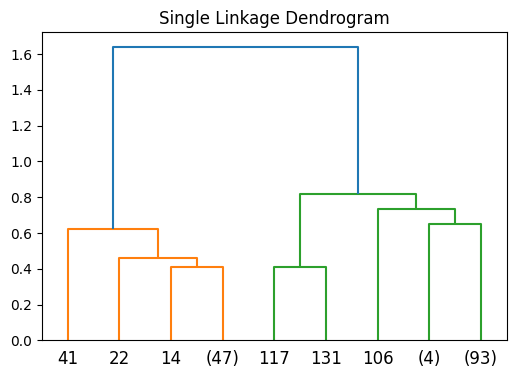

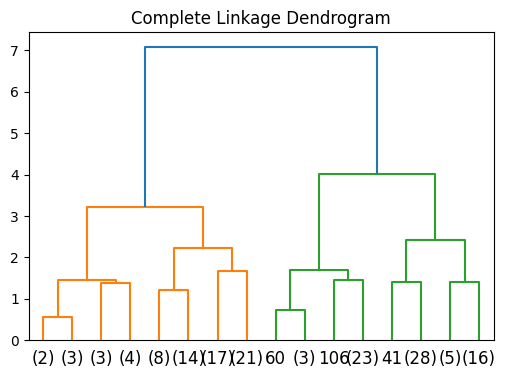

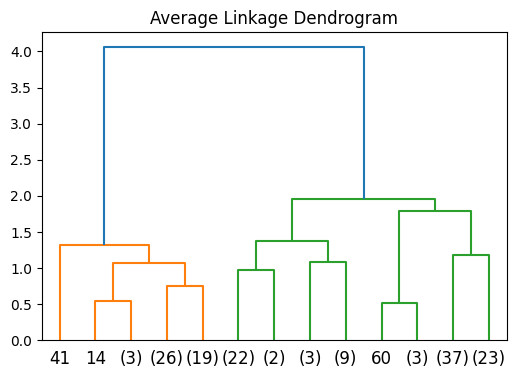

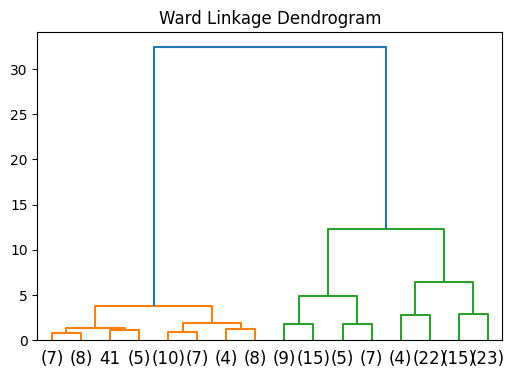

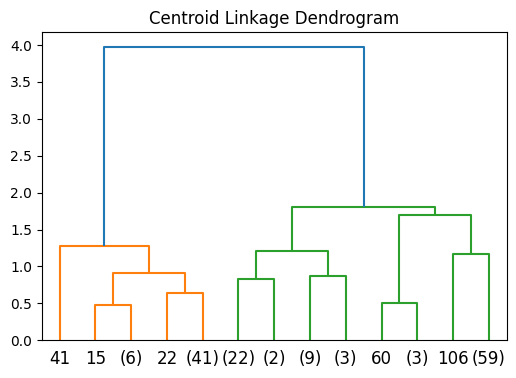

In [4]:
#Hierarchial Linkages
from scipy.cluster.hierarchy import linkage, dendrogram
iris = load_iris()
X = iris.data

methods = ['single', 'complete', 'average', 'ward', 'centroid']
for method in methods:
    Z = linkage(X, method=method)
    plt.figure(figsize=(6,4))
    dendrogram(Z, truncate_mode='level', p=3)
    plt.title(f"{method.capitalize()} Linkage Dendrogram")
    plt.show()#Agglomerative Clustering - bottom-up hierarchical clustering
#. It starts with each object forming its own cluster and then iteratively merges the clusters according to their similarity to form large clusters.
#Suitable for small to medium datasets

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, SpectralClustering

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X)
plot_clusters(X, agglo_labels, "Agglomerative Clustering")

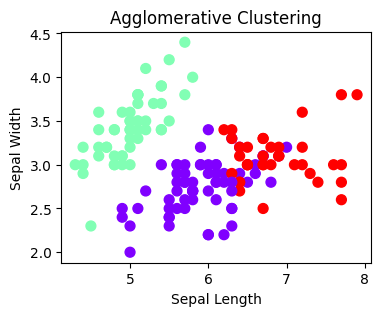

In [5]:
#Agglomerative Clustering - bottom-up hierarchical clustering
#. It starts with each object forming its own cluster and then iteratively merges the clusters according to their similarity to form large clusters.
#Suitable for small to medium datasets

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, SpectralClustering

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X)
plot_clusters(X, agglo_labels, "Agglomerative Clustering")

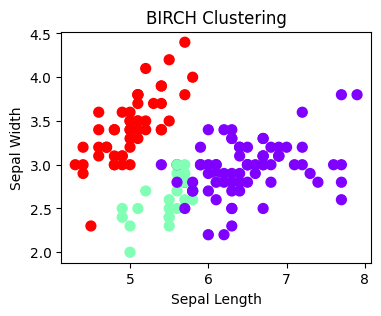

In [6]:
#BIRCH - incremental clustering for large datasets
'''BIRCH (Balanced Iterative Reducing and Clustering hierarchies) is a hierarchical clustering algorithm that is designed to handle
large datasets efficiently. The algorithm builds a treelike structure of clusters
by recursively partitioning the data into subclusters until a stopping criterion is met.'''

birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X)
plot_clusters(X, birch_labels, "BIRCH Clustering")

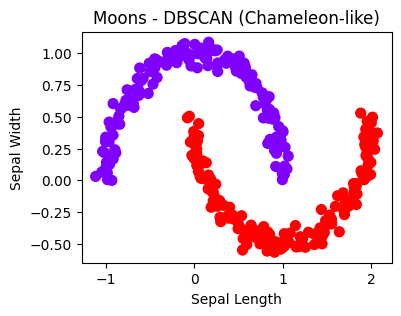

In [7]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=300, noise=0.05)

# DBSCAN for complex shapes
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_moons)
plot_clusters(X_moons, labels_dbscan, "Moons - DBSCAN (Chameleon-like)")

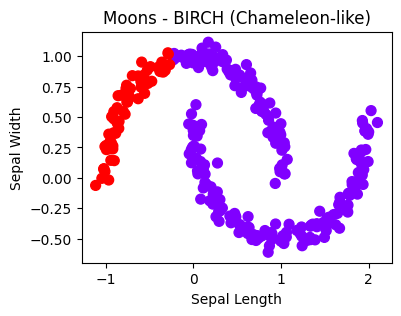

In [8]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.05)
birch = Birch(n_clusters=2)
labels_birch = birch.fit_predict(X_moons)
plot_clusters(X_moons, labels_birch, "Moons - BIRCH (Chameleon-like)")

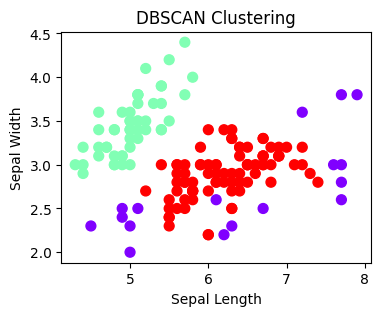

In [9]:
#DBSCAN - density-based clustering, can find arbitrarily shaped clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
plot_clusters(X, dbscan_labels, "DBSCAN Clustering")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


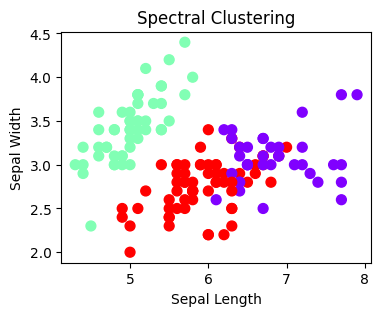

In [10]:
#SPECTRAL CLUSTERING - uses graph theory & eigenvectors of similarity matrix
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)
plot_clusters(X, spectral_labels, "Spectral Clustering")